# Projet d'Analyse de Données
Ce notebook va traiter dans la première partie d'un jeu de données sur la classification de verres puis afin d'approfondir mes expérimentations des différentes méthodes ( et n'ayant pas obtenu des résultats concluants ) je vais étendre le projet à un deuxième jeu de données dans la deuxième partie.

## Partie 1
Cette première partie du projet utilise les données d'identification du type de verre ( verre pour la construction, pour voiture ..ect ) disponibles sur le site UCI au lien : http://archive.ics.uci.edu/ml/datasets/Glass+Identification
<br>La première cellule se charge de télécharger les données concernées et peut être décommentée au besoin.

In [1]:
#!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

#### Je commence d'abord par effectuer l'import de l'ensemble des modules nécessaires à la réalisation du projet. Après cela je renomme les colonnes du DataFrame avec leurs véritables noms trouvable sur la description UCI.

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

df = pd.read_csv("glass.data")
df.columns = ["Id",
    "RI: refractive index",
    "Na: Sodium ",
    "Mg: Magnesium",
    "Al: Aluminum",
    "Si: Silicon",
    "K: Potassium",
    "Ca: Calcium",
    "Ba: Barium",
    "Fe: Iron",
    "Glass Type"
             ]
print(df.columns)
print(df.head())
print("Labels existants : "+str(df['Glass Type'].unique()))

Index(['Id', 'RI: refractive index', 'Na: Sodium ', 'Mg: Magnesium',
       'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium',
       'Ba: Barium', 'Fe: Iron', 'Glass Type'],
      dtype='object')
   Id  RI: refractive index  Na: Sodium   Mg: Magnesium  Al: Aluminum  \
0   2               1.51761        13.89           3.60          1.36   
1   3               1.51618        13.53           3.55          1.54   
2   4               1.51766        13.21           3.69          1.29   
3   5               1.51742        13.27           3.62          1.24   
4   6               1.51596        12.79           3.61          1.62   

   Si: Silicon  K: Potassium  Ca: Calcium  Ba: Barium  Fe: Iron  Glass Type  
0        72.73          0.48         7.83         0.0      0.00           1  
1        72.99          0.39         7.78         0.0      0.00           1  
2        72.61          0.57         8.22         0.0      0.00           1  
3        73.08          0.55         8.07

#### Je sépare les labels du reste des attributs.

In [3]:
df = df.dropna()
Y = df["Glass Type"]
X = df.drop("Glass Type", 1)
print("Description des attributs : \n"+str(X.describe()))
print("Aperçu des labels : \n"+str(Y.head()))

Description des attributs : 
               Id  RI: refractive index  Na: Sodium   Mg: Magnesium  \
count  213.000000            213.000000   213.000000     213.000000   
mean   108.000000              1.518353    13.406761       2.676056   
std     61.631972              0.003039     0.818371       1.440453   
min      2.000000              1.511150    10.730000       0.000000   
25%     55.000000              1.516520    12.900000       2.090000   
50%    108.000000              1.517680    13.300000       3.480000   
75%    161.000000              1.519150    13.830000       3.600000   
max    214.000000              1.533930    17.380000       3.980000   

       Al: Aluminum  Si: Silicon  K: Potassium  Ca: Calcium  Ba: Barium  \
count    213.000000   213.000000    213.000000   213.000000  213.000000   
mean       1.446526    72.655023      0.499108     8.957934    0.175869   
std        0.499882     0.774052      0.653035     1.426435    0.498245   
min        0.290000    69.81000

#### Je vais maintenant appliquer l'algorithme d'ACP afin d'obtenir des dimensions factoriels représentatifs pour le jeu de données.

In [4]:
# Pas besoin de factoriser car les données sont déja numériques
# remplacer les valeurs nulls par les plus frequentes
data_cat_encoded = pd.DataFrame(X)
imputer = SimpleImputer(missing_values= -1, strategy="most_frequent")

# remplacer dans le dataset
data_cat_enc = imputer.fit_transform(data_cat_encoded)

#nombre d'observations
n = data_cat_enc.shape[0]
#nombre de variables
p = data_cat_enc.shape[1]

print("Exemple avant mise à l'echelle : \n"+str(data_cat_enc[0]))
scaler = StandardScaler()
scaler.fit(data_cat_enc)
scaled_data = scaler.transform(data_cat_enc)
print("Exemple après mise à l'echelle : \n"+str(scaled_data[0]))

pca = PCA(n_components=10)
pca.fit(scaled_data)
results = pca.fit_transform(scaled_data)

Exemple avant mise à l'echelle : 
[ 2.       1.51761 13.89     3.6      1.36    72.73     0.48     7.83
  0.       0.     ]
Exemple après mise à l'echelle : 
[-1.72393811 -0.2451006   0.59188032  0.64293659 -0.17350018  0.09709059
 -0.02932918 -0.79259935 -0.35380764 -0.58830108]


### Observation sur ACP

Individus


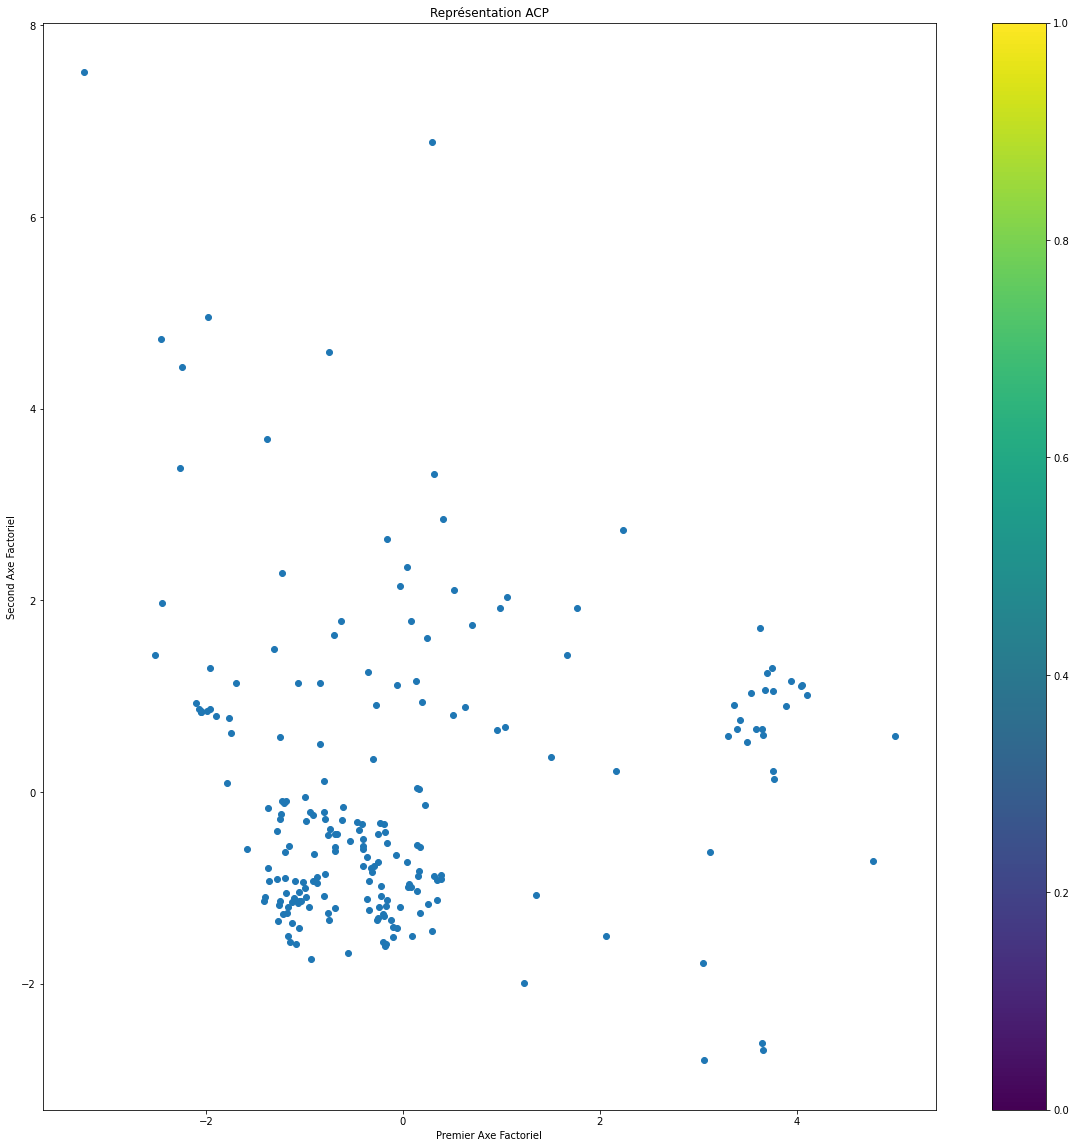

In [5]:
print("Individus")
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figheight(20)
fig.set_figwidth(20)
scatter = ax.scatter(results[:,0],results[:,1])
ax.set_title('Représentation ACP')
ax.set_xlabel('Premier Axe Factoriel')
ax.set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)


#### On observe les individus se regrouper dans deux zones ou la densité est bien supérieure, cependant il reste quelques individus éparpillés tout autour.

------------- Valeurs propres --------- 

[2.83102216e+00 2.34070235e+00 1.41475320e+00 1.16624640e+00
 9.20140310e-01 5.89430670e-01 3.70847037e-01 3.48247726e-01
 6.41696032e-02 1.61036151e-03] 

-------------- Valeurs propres corrigés----------- 

[2.81773097e+00 2.32971314e+00 1.40811116e+00 1.16077107e+00
 9.15820402e-01 5.86663390e-01 3.69105971e-01 3.46612760e-01
 6.38683374e-02 1.60280113e-03]


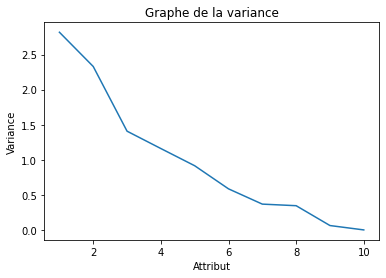

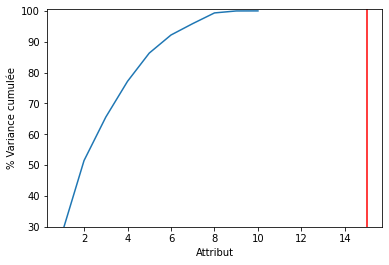

In [6]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
# Valeurs propres
print("------------- Valeurs propres --------- \n")
print(pca.explained_variance_,"\n")

corrected_variance = ((n-1)/n)*pca.explained_variance_
print("-------------- Valeurs propres corrigés----------- \n")
print(corrected_variance)


# Graphe de la variance de chaque attribut
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Graphe de la variance")
plt.ylabel("Variance")
plt.xlabel("Attribut")
plt.show()



plt.ylabel('% Variance cumulée')
plt.xlabel('Attribut')
plt.axvline(x=15,color='red')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

Covariance


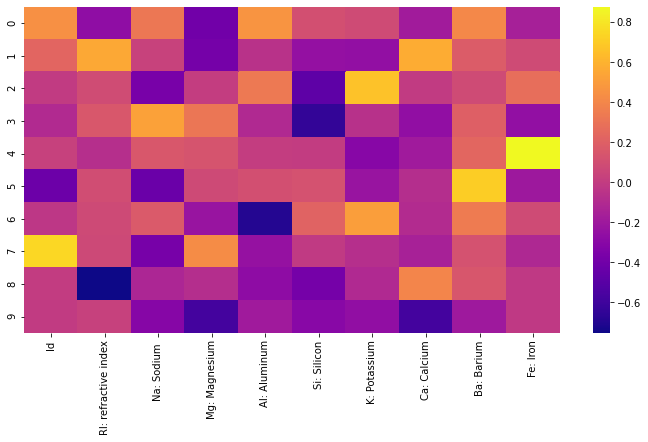

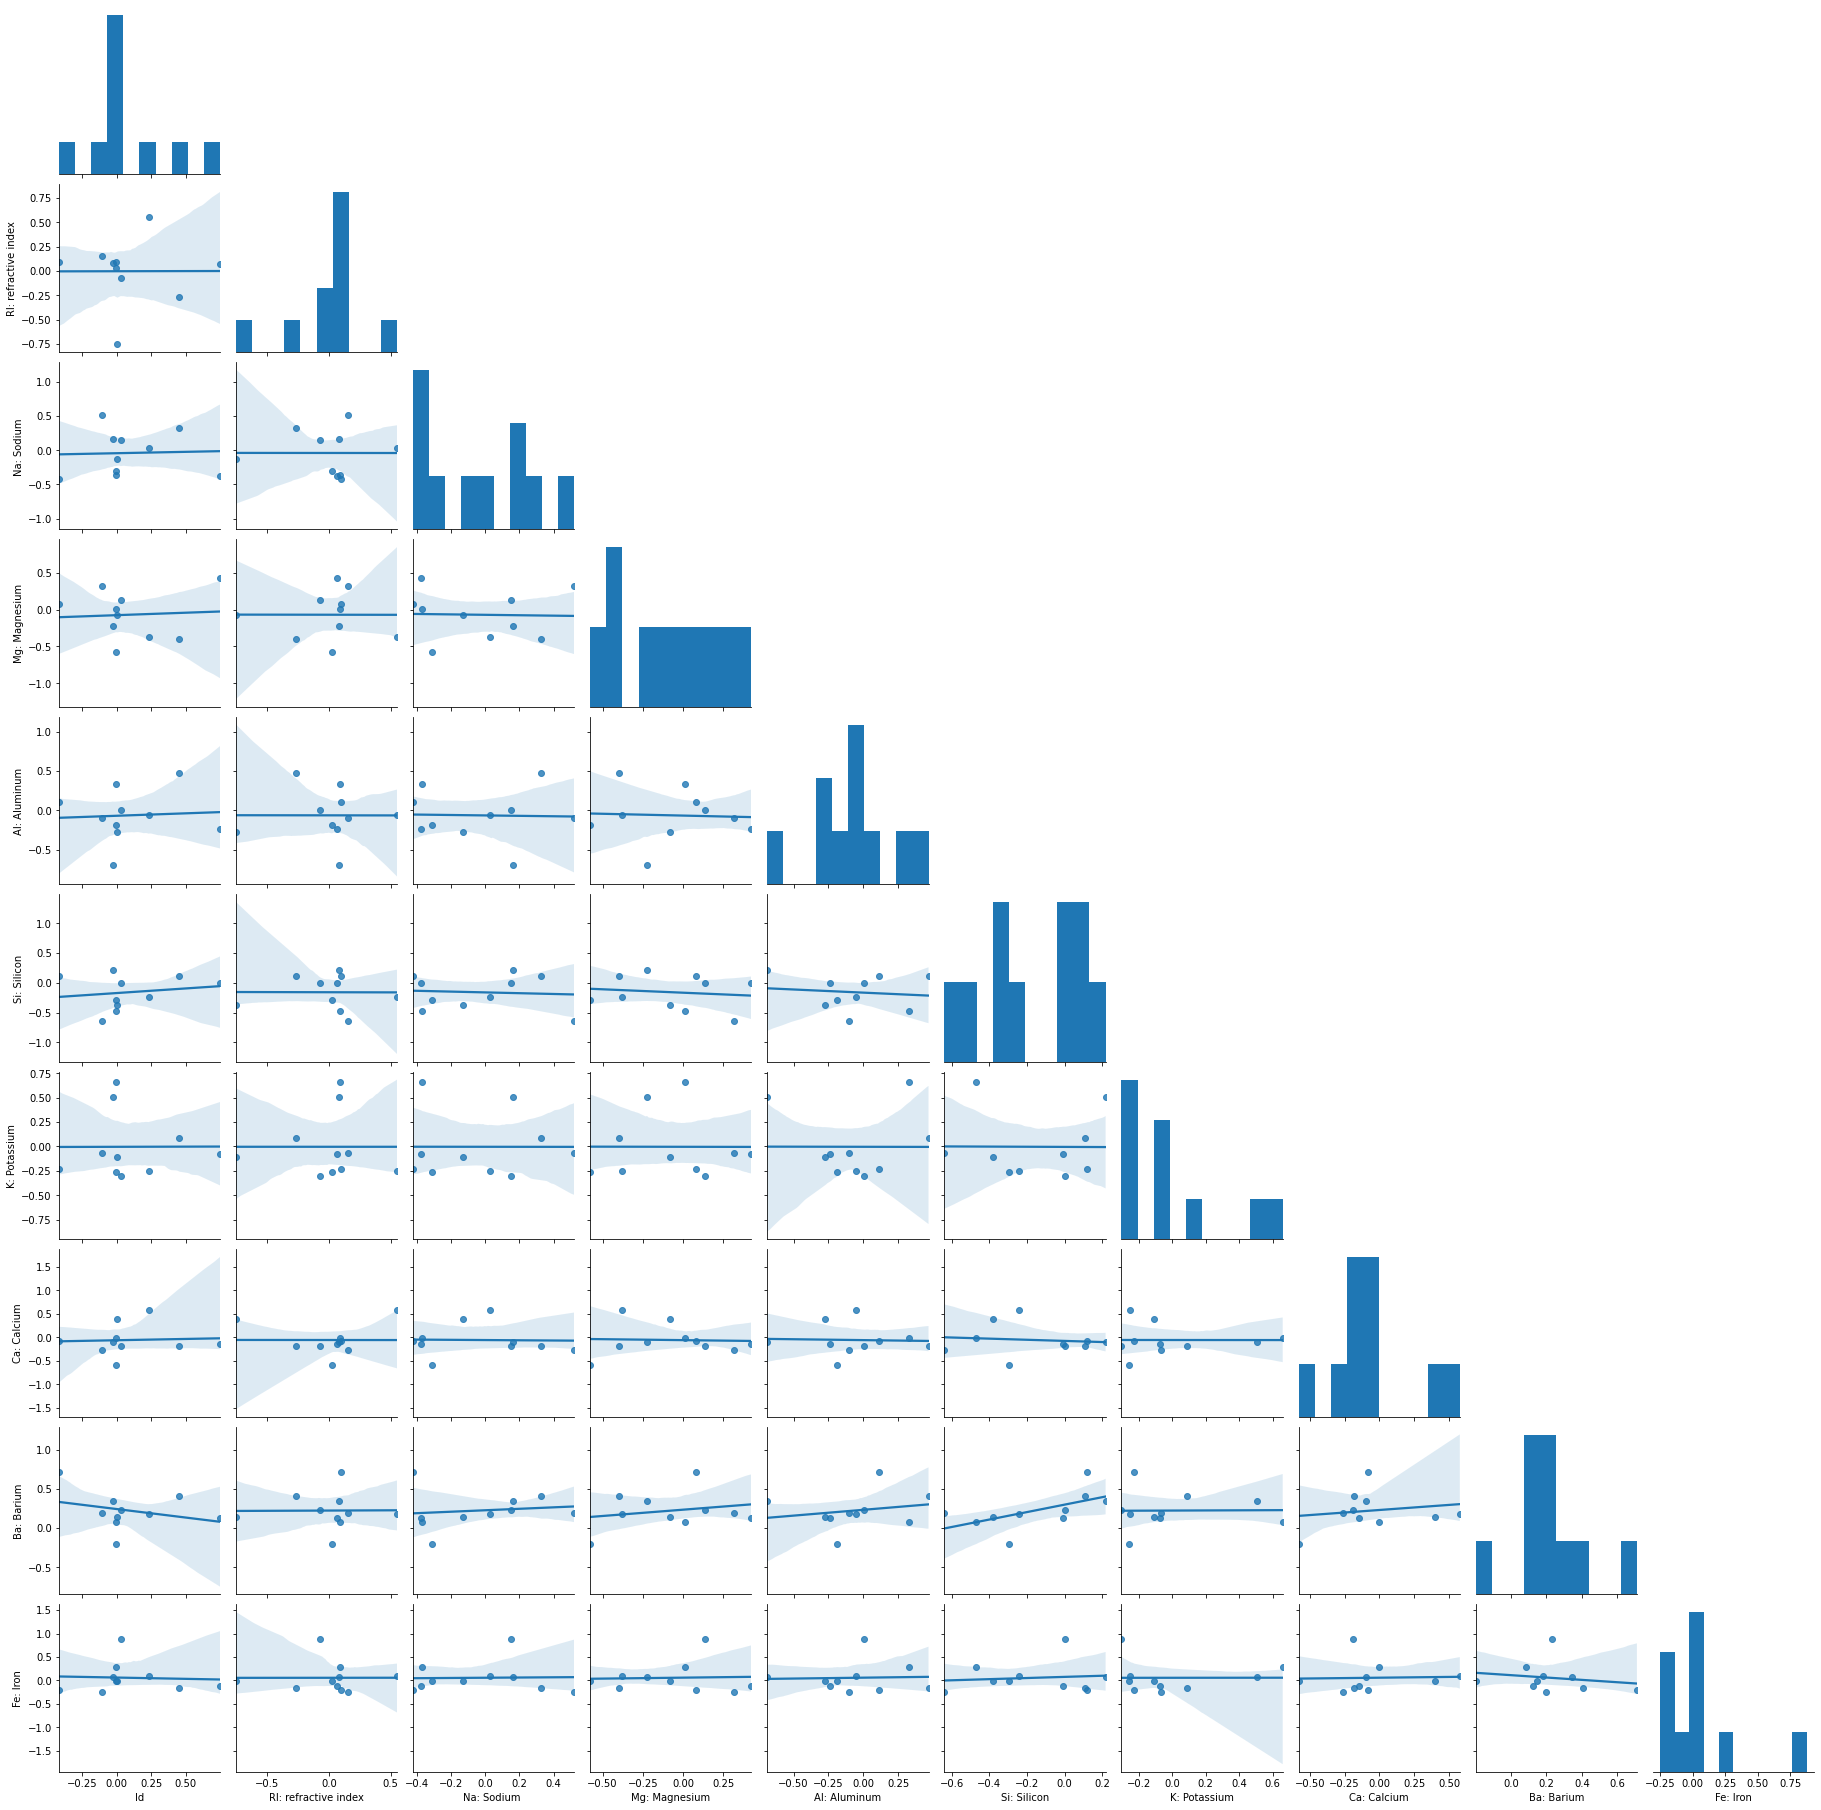

In [7]:
# Plot the correlation circle
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
print("Covariance")
sns.heatmap(df_comp,cmap='plasma',)
sns.pairplot(df_comp, kind="reg", palette="husl", corner=True)
# Calcul de correlation des variables  
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))


#### Il y'a quelques variables ayant de fortes corrélation commme le Silicon et l'Aluminium ou encore le Potassium et et le Barium

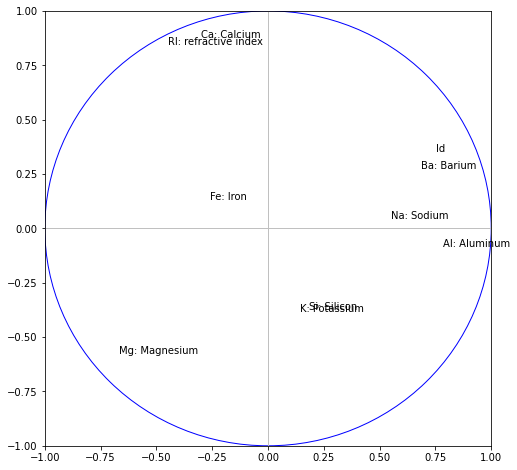

In [8]:
for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
     plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

#### On remarque dans ce cercle que les attributs les plus liés sont Calcium/Refractive Index ainsi que Potasium/Silicon le  reste des éléments sont éparpillés  tout autour de manière distante. De plus les individus étant assez eloignés des axes on peut en déduire que ces axes représentent bien les attributs.

### Clustering sur données initiales

Meilleur nombre de clusters : 4


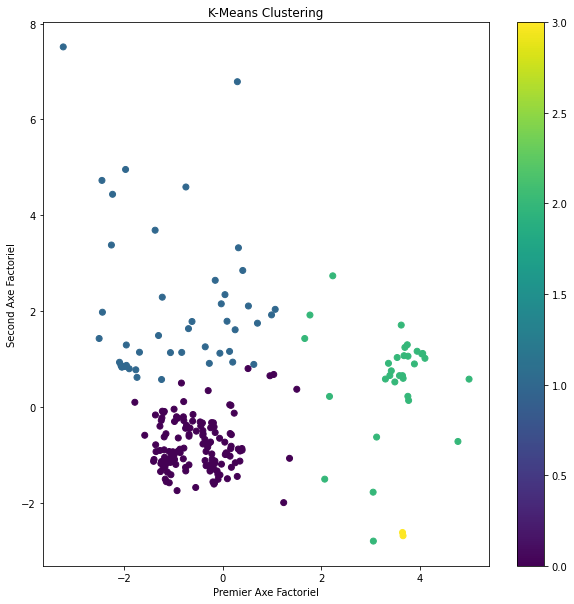

In [9]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(3,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_data)
    centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_data, preds)
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score

print("Meilleur nombre de clusters : "+str(best_number))
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))


best_number_normal = best_number
best_preds_normal = best_preds
best_score_normal = best_score

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figheight(10)
fig.set_figwidth(10)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Premier Axe Factoriel')
ax.set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)

#### Le meilleur nombre de clusters définis par la méthode silouhette est de 4 ce qui n'est pas equivalent au nombre de classes présents initialient qui était de 7.

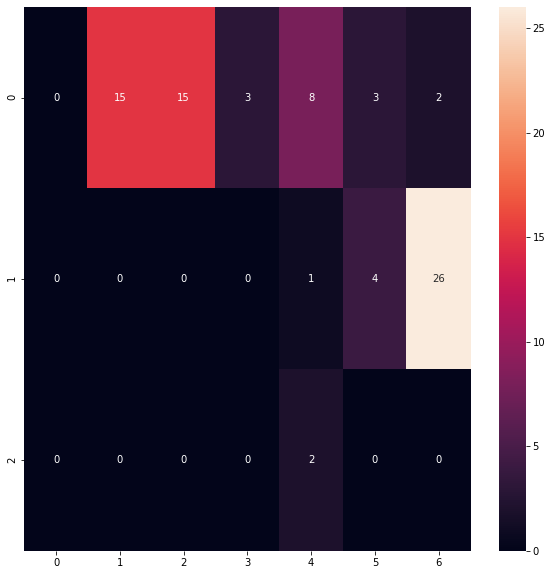

In [10]:
array = confusion_matrix(best_preds, Y)[1:best_number]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

#### On observe dans cette matrice de confusion ( là ou chaque colonne est une des classes initiales et chaque ligne un des clusters ) que la majorité des individus d'une même classe sont souvent regroupés ensemble mise à part pour 2 classes qui sont  plus distribués ( une avec 56/20/0 et une autre avec 8/2/3 ) 

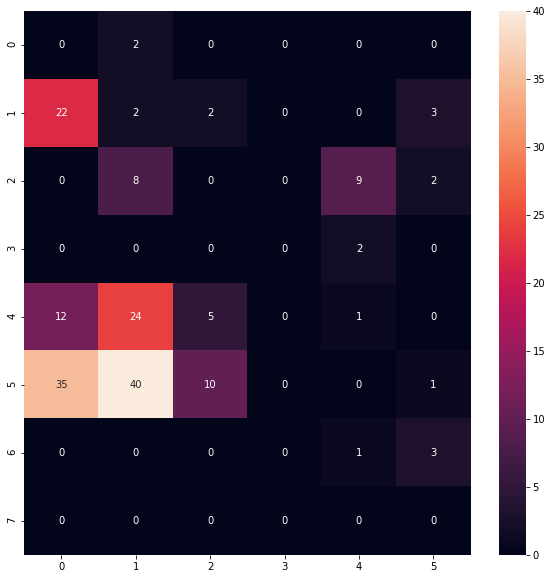

In [11]:
clusterer = KMeans(n_clusters=7)
preds = clusterer.fit_predict(scaled_data)

array = confusion_matrix(preds, Y)[:,1:7]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

#### Même en fixant un nombre de clusters égale au nombre de classe certaines classes se retrouvent mélangés ( comment onn peut le remarquer pour les cas de 39, 42 et 12 de 3 classes différentes mais pourtant dans le même cluster ) . On peut donc considérer que ce clustering ne reproduit pas de  manière equivalente les classes initiales.

### Clustering sur PCA

In [12]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(3,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(results[:,:1])
    centers = clusterer.cluster_centers_

    score = silhouette_score(results, preds)
    print("Pour {} clusters le score silhouette = {}".format(n_clusters, score))
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score
        
print("Meilleur nombre de clusters sur PCA : "+str(best_number))

Pour 3 clusters le score silhouette = 0.1348072385105943
Pour 4 clusters le score silhouette = 0.1155320252918314
Pour 5 clusters le score silhouette = 0.10957340908126097
Pour 6 clusters le score silhouette = 0.055827094264041116
Pour 7 clusters le score silhouette = 0.05760761149903678
Pour 8 clusters le score silhouette = 0.044540887602858806
Meilleur nombre de clusters sur PCA : 3


[[-7.53337402e-01 -1.33660447e+00 -5.31570029e-01 ... -1.07188645e+00
  -2.85991818e-01 -3.90574111e-03]
 [-5.51352352e-01 -1.68189878e+00 -5.41976706e-01 ... -1.01531241e+00
  -9.74347953e-02  2.83768317e-02]
 [-1.16146804e+00 -1.19978787e+00 -1.04497068e-01 ... -7.23624492e-01
  -4.80280513e-03  9.75501612e-02]
 ...
 [ 3.62302794e+00  1.70722317e+00 -9.05643464e-01 ...  3.47864589e-01
  -8.90135407e-01  4.53878869e-02]
 [ 3.89063814e+00  8.96342048e-01 -1.21958354e+00 ...  2.70794626e-01
   7.60050910e-02 -2.84718470e-02]
 [ 3.94590237e+00  1.16072385e+00 -8.71160964e-01 ...  3.11713472e-01
   6.44068109e-02 -2.05272906e-02]]


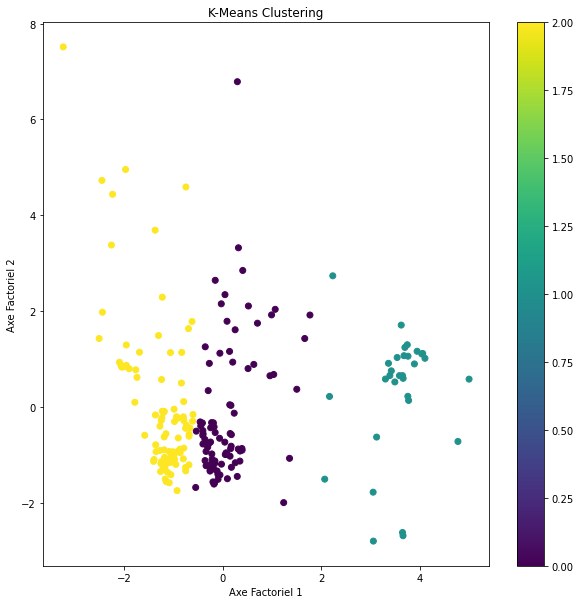

In [13]:
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))
print(results)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Axe Factoriel 1')
ax.set_ylabel('Axe Factoriel 2')
plt.colorbar(scatter)

#### On remarque que le meilleur nombre de clusters trouvés sur les données résultantes de la réduction de dimension est  de 3 clusters et lorsque l'on visualise les données on se rend compte que les distributions sont  différentes des invidivus entre les 2 clusterings.

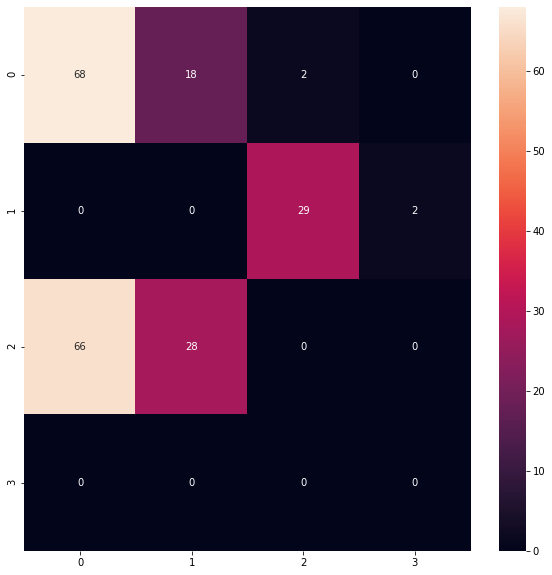

In [14]:
array = confusion_matrix(best_preds, best_preds_normal) 
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

#### En appliquant le calcul de matrice de confusion entre le clustering pré-ACP et celui post-ACP on remarque aussi une grande différence particulièrement pour le cluster 2 constitué dans le clustering post-ACP de 157 individus et qui sont sont répartis en 84 et 73 sur deux clusters différents dans celui pré-ACP.

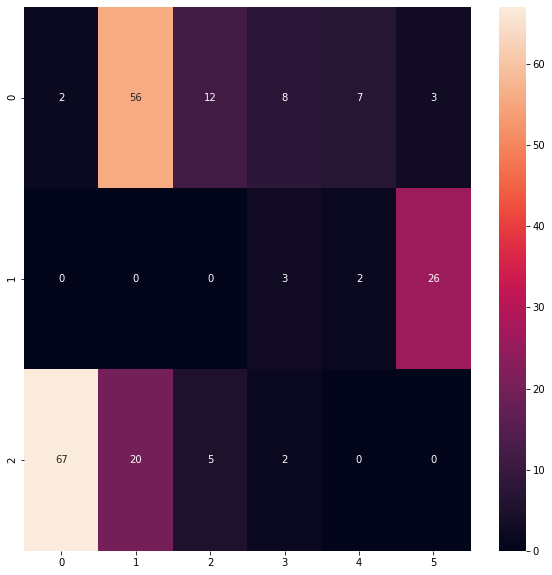

In [15]:
array = confusion_matrix(best_preds, Y)[:best_number,1:8]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

#### Dans cette matrice de confusion on voit une assez bonne concentration des individus d'une même classe dans un même cluster tout comme le clustering sur les données pré-ACP

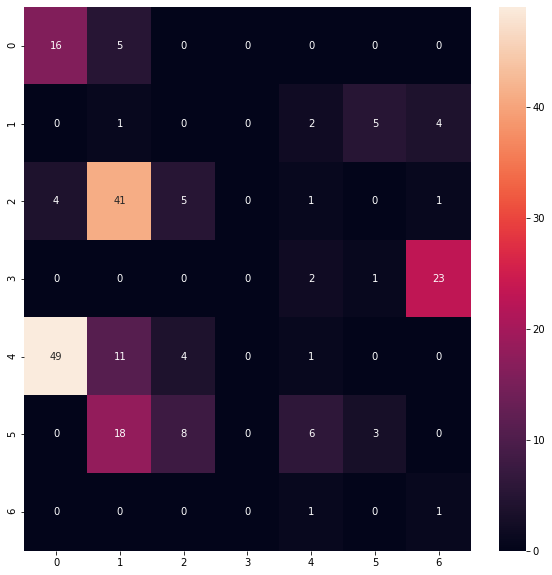

In [16]:
clusterer = KMeans(n_clusters=7)
preds = clusterer.fit_predict(results[:,:1])
array = confusion_matrix(preds, Y)[:7,1:8]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

#### Ici contrairement au cas pré-ACP les individus de chaque classe sont bien mieux répartis et sur une plus grande variété de clusters.

### Algorithme LDA
J'applique d'abord l'algorithme de LDA en utilisant les clusters définis par le K-Means puis dans un second temps  en utilisant les étiquettes du jeu de données originel.

Pré-LDA


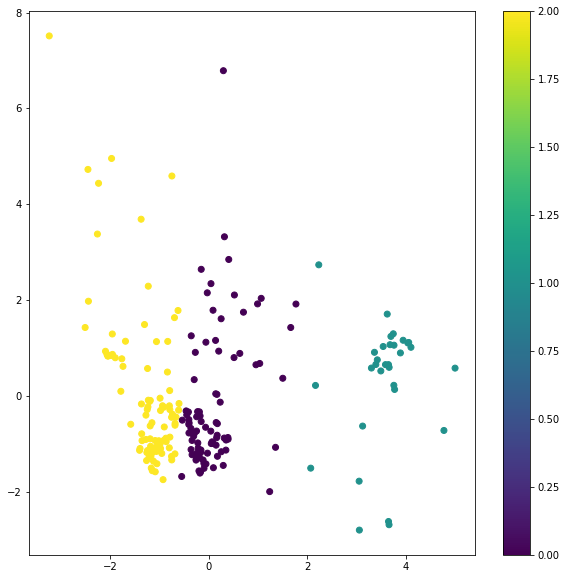

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data , best_preds, test_size=0.30,random_state=42,shuffle=True)
lda = LDA(n_components=2)
X_lda_sklearn = lda.fit_transform(X_train, y_train)

def plot_scikit_lda(X_train, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_train[:,0][y_train == label],
                    y=X_train[:,1][y_train == label] * -1, 
                    marker=marker,
                    color=color,
                    alpha=0.5,
                   )
    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    
    plt.grid()
    plt.tight_layout
    #plt.show()

plt.figure(figsize = (10,10))
print("Pré-LDA")
plt.scatter(results[:,0],results[:,1],  c=best_preds)
plt.colorbar(scatter)



No handles with labels found to put in legend.


LDA


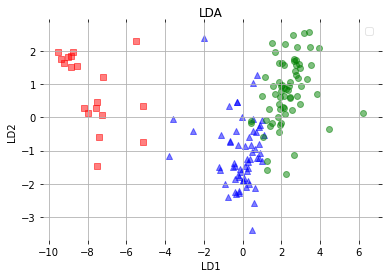

In [18]:
print("LDA")
plot_scikit_lda(X_lda_sklearn, title='LDA')

#### Après application de LDA sur les données avec le clustering crée précedemment on observe que la séparation entre les ensembles n'est pas forcément meilleure que ce qu'elle était avant. Afin d'observer plus de possibilités je vais appliquer LDA en utilisant les classes du jeu de données originel.

Pré-LDA


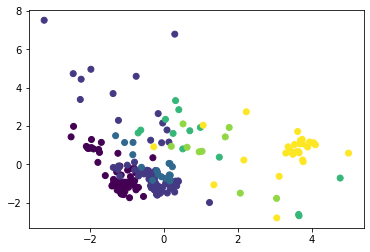

<Figure size 1440x1440 with 0 Axes>

No handles with labels found to put in legend.


LDA


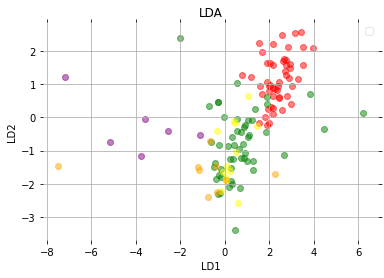

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data , Y.values, test_size=0.30,random_state=42,shuffle=True)
lda = LDA(n_components=2)
Xlda = lda.fit_transform(X_train, y_train)

def plot_scikit_lda(X_train, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(7),('o', 'o', 'o','o','o','o','o'),('blue', 'red', 'green', 'yellow', 'brown', 'orange', 'purple')):

        plt.scatter(x=X_train[:,0][y_train == label],
                    y=X_train[:,1][y_train == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                   # label=label_dict[label]
                   )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

print("Pré-LDA")
plt.scatter(results[:,0],results[:,1],  c=Y.values)
plt.figure(figsize=(20,20))
plt.show()
print("LDA")
plot_scikit_lda(X_lda_sklearn, title='LDA')


Accuracy de : 90.625
Variance expliquée pour les deux nouveaux axes  : [0.8368771  0.11135735]


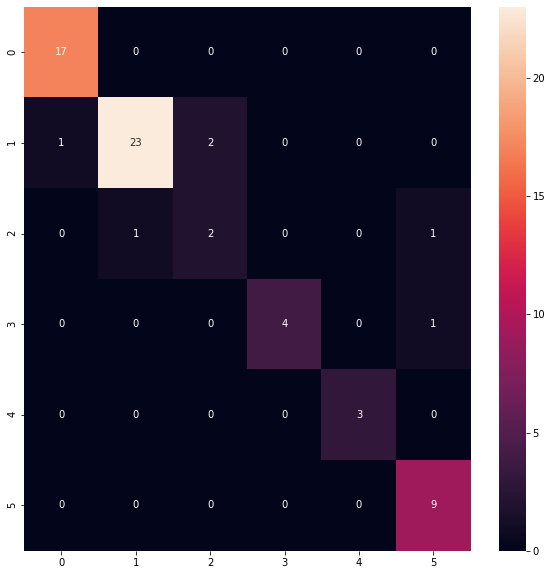

In [20]:
results = lda.predict(X_test)
array = confusion_matrix(results, y_test)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)
n_test=X_test.shape[0]
print("Accuracy de : "+str(np.trace(array)/n_test*100))
print("Variance expliquée pour les deux nouveaux axes  : "+str(lda.explained_variance_ratio_))

#### Dans ce cas on remarque que la séparation crée par LDA est bien plus prononcée et nette, de plus la matrice de confusion, l'accuracy ainsi que la variance expliquée indique des scores plutôt corrects.

# Partie 2
#### Afin de mieux tester la méthode LDA j'ai continuer mes expérimentations sur un autre jeu de données ( disponible ici http://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29) et concernant des parties de jeu d'echec.

In [21]:
#!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data"

In [22]:
df = pd.read_csv("kr-vs-kp.data")
print(df.columns)

Index(['f', 'f.1', 'f.2', 'f.3', 'f.4', 'f.5', 'f.6', 'f.7', 'f.8', 'f.9',
       'f.10', 'f.11', 'l', 'f.12', 'n', 'f.13', 'f.14', 't', 'f.15', 'f.16',
       'f.17', 'f.18', 'f.19', 'f.20', 'f.21', 't.1', 'f.22', 'f.23', 'f.24',
       'f.25', 'f.26', 'f.27', 'f.28', 't.2', 't.3', 'n.1', 'won'],
      dtype='object')


In [23]:
df = df.dropna()
Y = pd.factorize(df["won"])
X = df.drop("won", 1)
print(X.describe())

           f   f.1   f.2   f.3   f.4   f.5   f.6   f.7   f.8   f.9  ...  f.22  \
count   3195  3195  3195  3195  3195  3195  3195  3195  3195  3195  ...  3195   
unique     2     2     2     2     2     2     2     2     2     2  ...     2   
top        f     f     f     f     f     f     f     f     f     f  ...     f   
freq    2838  2970  3075  2873  2128  1721  2025  2499  1979  2224  ...  3020   

        f.23  f.24  f.25  f.26  f.27  f.28   t.2   t.3   n.1  
count   3195  3195  3195  3195  3195  3195  3195  3195  3195  
unique     2     2     2     2     2     2     2     2     2  
top        f     f     f     f     f     f     t     t     n  
freq    3194  3148  3059  2630  3020  1983  2006  2344  2406  

[4 rows x 36 columns]


In [24]:
# factorisation
data_cat_encoded = []
data_categories = []
for x in X:
    data_cat_encod, data_categ = pd.factorize(X[x])
    data_cat_encoded.append(data_cat_encod)
    data_categories.append(data_categ)

# remplacer les valeurs nulls par les plus frequentes
data_cat_encoded = pd.DataFrame(np.transpose(data_cat_encoded))
imputer = SimpleImputer(missing_values= -1, strategy="most_frequent")

# remplacer dans le dataset
data_cat_enc = imputer.fit_transform(data_cat_encoded)

#nombre d'observations
n = data_cat_enc.shape[0]
#nombre de variables
p = data_cat_enc.shape[1]

scaler = StandardScaler()
scaler.fit(data_cat_enc)
scaled_data = scaler.transform(data_cat_enc)


pca = PCA(n_components=36)
pca.fit(scaled_data )
results = pca.fit_transform(scaled_data)

Individus


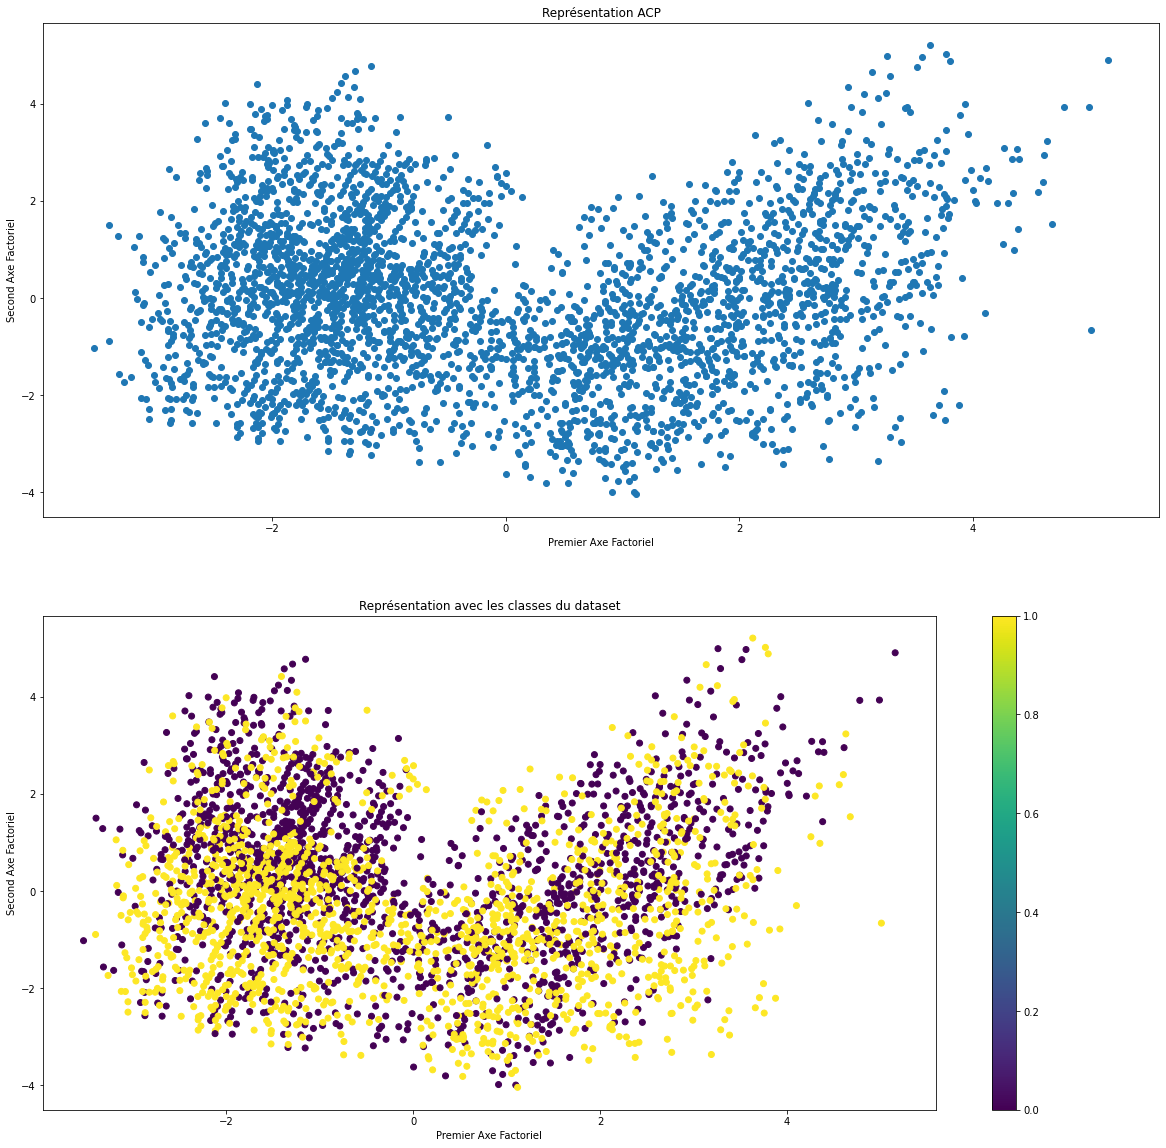

In [25]:
print("Individus")
fig, ax = plt.subplots(2)

scatter = ax[0].scatter(results[:,0],results[:,1])
ax[0].set_title('Représentation ACP')
ax[0].set_xlabel('Premier Axe Factoriel')
ax[0].set_ylabel('Second Axe Factoriel')

scatter2 = ax[1].scatter(results[:,0],results[:,1], c=Y[0])
ax[1].set_title('Représentation avec les classes du dataset')
ax[1].set_xlabel('Premier Axe Factoriel')
ax[1].set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)
fig.set_figheight(20)
fig.set_figwidth(20)

#### Ici les individus sont plus regroupés en une seule grande zone centrale plutôt que divisés.

------------- Valeurs propres --------- 

[3.60741493 2.84750834 2.59788689 1.90483938 1.85551538 1.51898141
 1.39057929 1.38513557 1.32719319 1.26273014 1.14010055 1.09077694
 0.99848168 0.97109784 0.949835   0.92569077 0.85186263 0.79271549
 0.76382397 0.72499179 0.70196325 0.66474925 0.6037503  0.56560959
 0.53877853 0.53024123 0.51567018 0.49016339 0.45655987 0.42648091
 0.40806158 0.3924072  0.32530777 0.28393415 0.15002641 0.05040634] 

-------------- Valeurs propres corrigés----------- 

[3.60628585 2.8466171  2.59707378 1.90424318 1.85493462 1.51850598
 1.39014406 1.38470204 1.32677779 1.26233492 1.13974371 1.09043554
 0.99816917 0.9707939  0.94953772 0.92540104 0.85159601 0.79246738
 0.7635849  0.72476488 0.70174354 0.66454119 0.60356133 0.56543256
 0.5386099  0.53007527 0.51550878 0.49000998 0.45641697 0.42634742
 0.40793386 0.39228438 0.32520595 0.28384528 0.14997946 0.05039057]


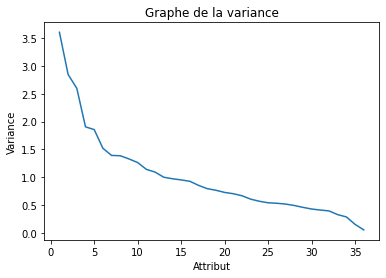

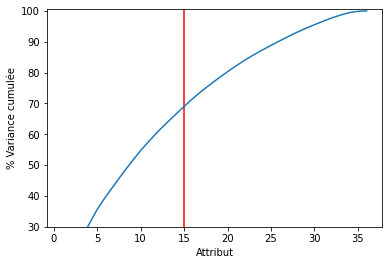

In [26]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
# Valeurs propres
print("------------- Valeurs propres --------- \n")
print(pca.explained_variance_,"\n")

corrected_variance = ((n-1)/n)*pca.explained_variance_
print("-------------- Valeurs propres corrigés----------- \n")
print(corrected_variance)


# Graphe de la variance de chaque attribut
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Graphe de la variance")
plt.ylabel("Variance")
plt.xlabel("Attribut")
plt.show()



plt.ylabel('% Variance cumulée')
plt.xlabel('Attribut')
plt.axvline(x=15,color='red')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

Heatmap de la covariance entre les attributs et Cercle de correlation


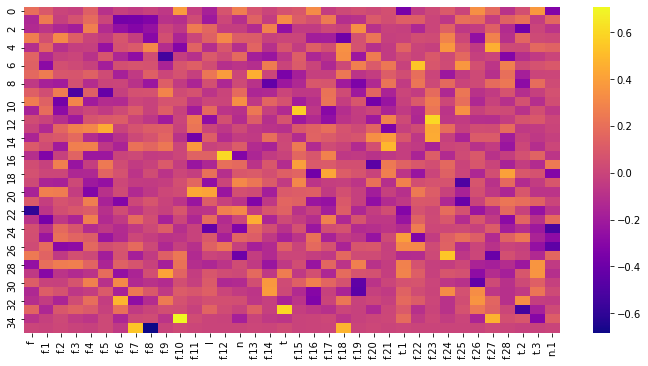

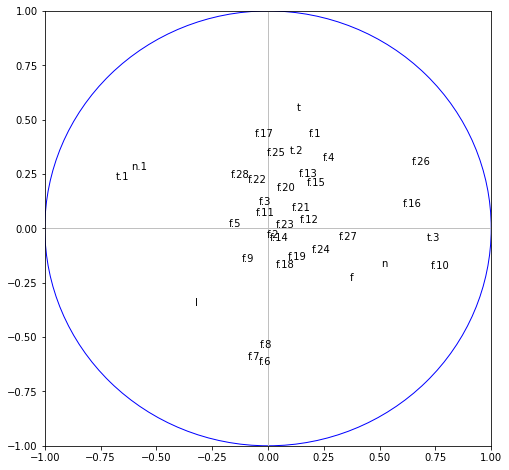

In [27]:
# Cercle de correlation
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
print("Heatmap de la covariance entre les attributs et Cercle de correlation")
sns.heatmap(df_comp,cmap='plasma',)
# Calcul de correlation des variables  
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))


for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
     plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.show()

#### Ici les attributs sont bien plus liés les uns entre les autres mais surtout ce que l'on peut remarquer c'est qu'ils se rapprochent plutôt assez du centre du cercle ce qui est interprétable par le fait que ces deux axes sont mal représentatifs pour les attributs.

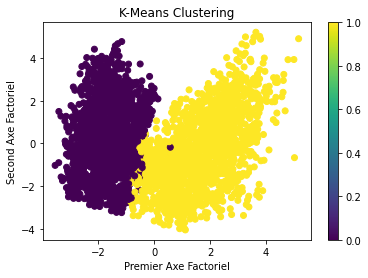

In [28]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_cat_enc)
    centers = clusterer.cluster_centers_
    score = silhouette_score(data_cat_enc, preds)
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score
        
# Calcul de correlation des variables  
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Premier Axe Factoriel')
ax.set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)


#### Ici on peut remarquer que le nombre de clusters choisis automatiquement est equivalent au nombre de labels initials du dataset.

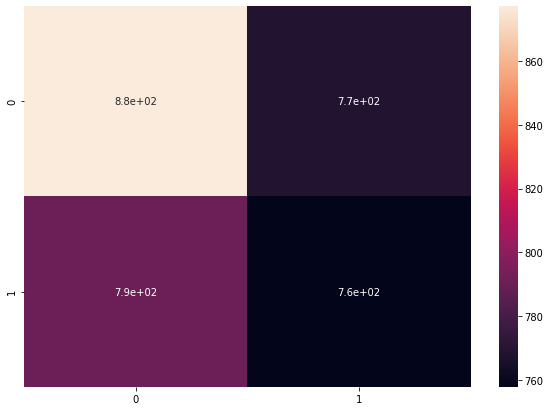

In [29]:
array = confusion_matrix(best_preds, Y[0])
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

#### Cependant avec cette confusion matrix on voit très  bien que les données sont répartis de manière relativement égale entre les différents clusters quelque soit la classe initiale. Donc même si le nombre de clusters est le bon, ses individus sont mélangés ( donc mauvais ) .

In [30]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(results[:,:1])
    centers = clusterer.cluster_centers_

    score = silhouette_score(results, preds)
    print("Pour un nombre de clusters égale à {}, le score silhouette est de {})".format(n_clusters, score))
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score

Pour un nombre de clusters égale à 2, le score silhouette est de 0.107118631054292)
Pour un nombre de clusters égale à 3, le score silhouette est de 0.043723371690036)
Pour un nombre de clusters égale à 4, le score silhouette est de 0.015777420521735242)
Pour un nombre de clusters égale à 5, le score silhouette est de 0.0095504059230876)
Pour un nombre de clusters égale à 6, le score silhouette est de -0.002904875887839347)
Pour un nombre de clusters égale à 7, le score silhouette est de -0.0022839887929047425)
Pour un nombre de clusters égale à 8, le score silhouette est de -0.00841608944572779)
Pour un nombre de clusters égale à 9, le score silhouette est de -0.011330521618629708)


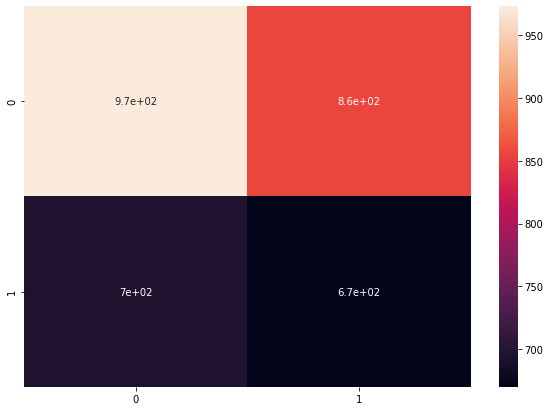

In [31]:
array = confusion_matrix(best_preds, Y[0])
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

#### Après application de PCA le Clustering donne des résultats assez similaire et aucune amélioration au niveau de la distribution des individus de chaque classe.

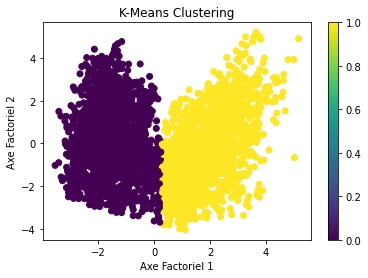

In [32]:
# Calcul de correlation des variables  
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Axe Factoriel 1')
ax.set_ylabel('Axe Factoriel 2')
plt.colorbar(scatter)

#### Les individus sont distribuées dans les clusters d'une manière différente que le clustering avant l'applicattion du PCA ( moins d'individus mélangés au milieu d'un même cluster ce qui est logique vu que notre représentation visuelle et le clustering se font sur les même données )

<>:19: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:19: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:458: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(36, 2 - 1) = 1 components.
  warnings.warn(
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
<ipython-input-33-581fbf4166fc>:19: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  y=1[y_train == label],


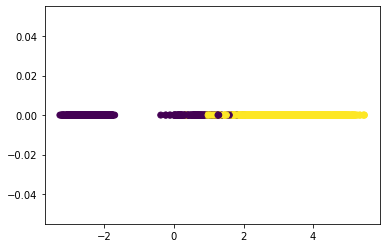

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data , best_preds, test_size=0.30,random_state=42,shuffle=True)


from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda_sklearn = lda.fit_transform(X_train, y_train)

def plot_scikit_lda(X_train, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_train[:,0][y_train == label],
                    #y=X_train[:,1][y_train == label] * -1, # flip the figure
                    y=1[y_train == label],
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

    
val = 0
ar = np.arange(len(X_lda_sklearn[:,0])) # just as an example array
plt.scatter(X_lda_sklearn[:,0], np.zeros_like(ar) + val, c=y_train)
plt.show()



#### La méthode LDA générant un nombre de dimension égale au nombre de classes initiales -1, j'obtiens donc une dimensionalité de 1 que je viens de plot et qui permet de visualiser une séparation entre les classes pas forcément meilleure qu'initialement.

Accuracy de : 95.9332638164755
Ratio de variance expliquée : 0.9999985831362727


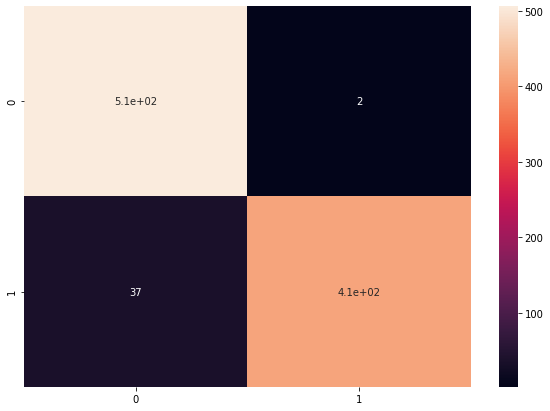

In [34]:
results = lda.predict(X_test)
array = confusion_matrix(results, y_test)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
n_test=X_test.shape[0]
print("Accuracy de : "+str(np.trace(array)/n_test*100))
print("Ratio de variance expliquée : "+str(lda.explained_variance_ratio_[0]))

#### Cependant après application sur les données de test et le calcul de la matrice de confusion et d'un test d'accuracy on remarque d'excellents résultats et donc une bonne utilité de LDA ici bien meilleure que sur le premier jeu de données.